In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-data-set/loan_data_set.csv
/kaggle/input/diabetes-dt/diabetes_DT.csv


In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier,plot_tree 
from sklearn.metrics import accuracy_score

diabetes=pd.read_csv('/kaggle/input/diabetes-dt/diabetes_DT.csv')
diabetes.columns



Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
X=diabetes.drop('Outcome',axis=1)
y=diabetes['Outcome']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)      #Decision Treee
y_pred=dtc.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

0.7467532467532467


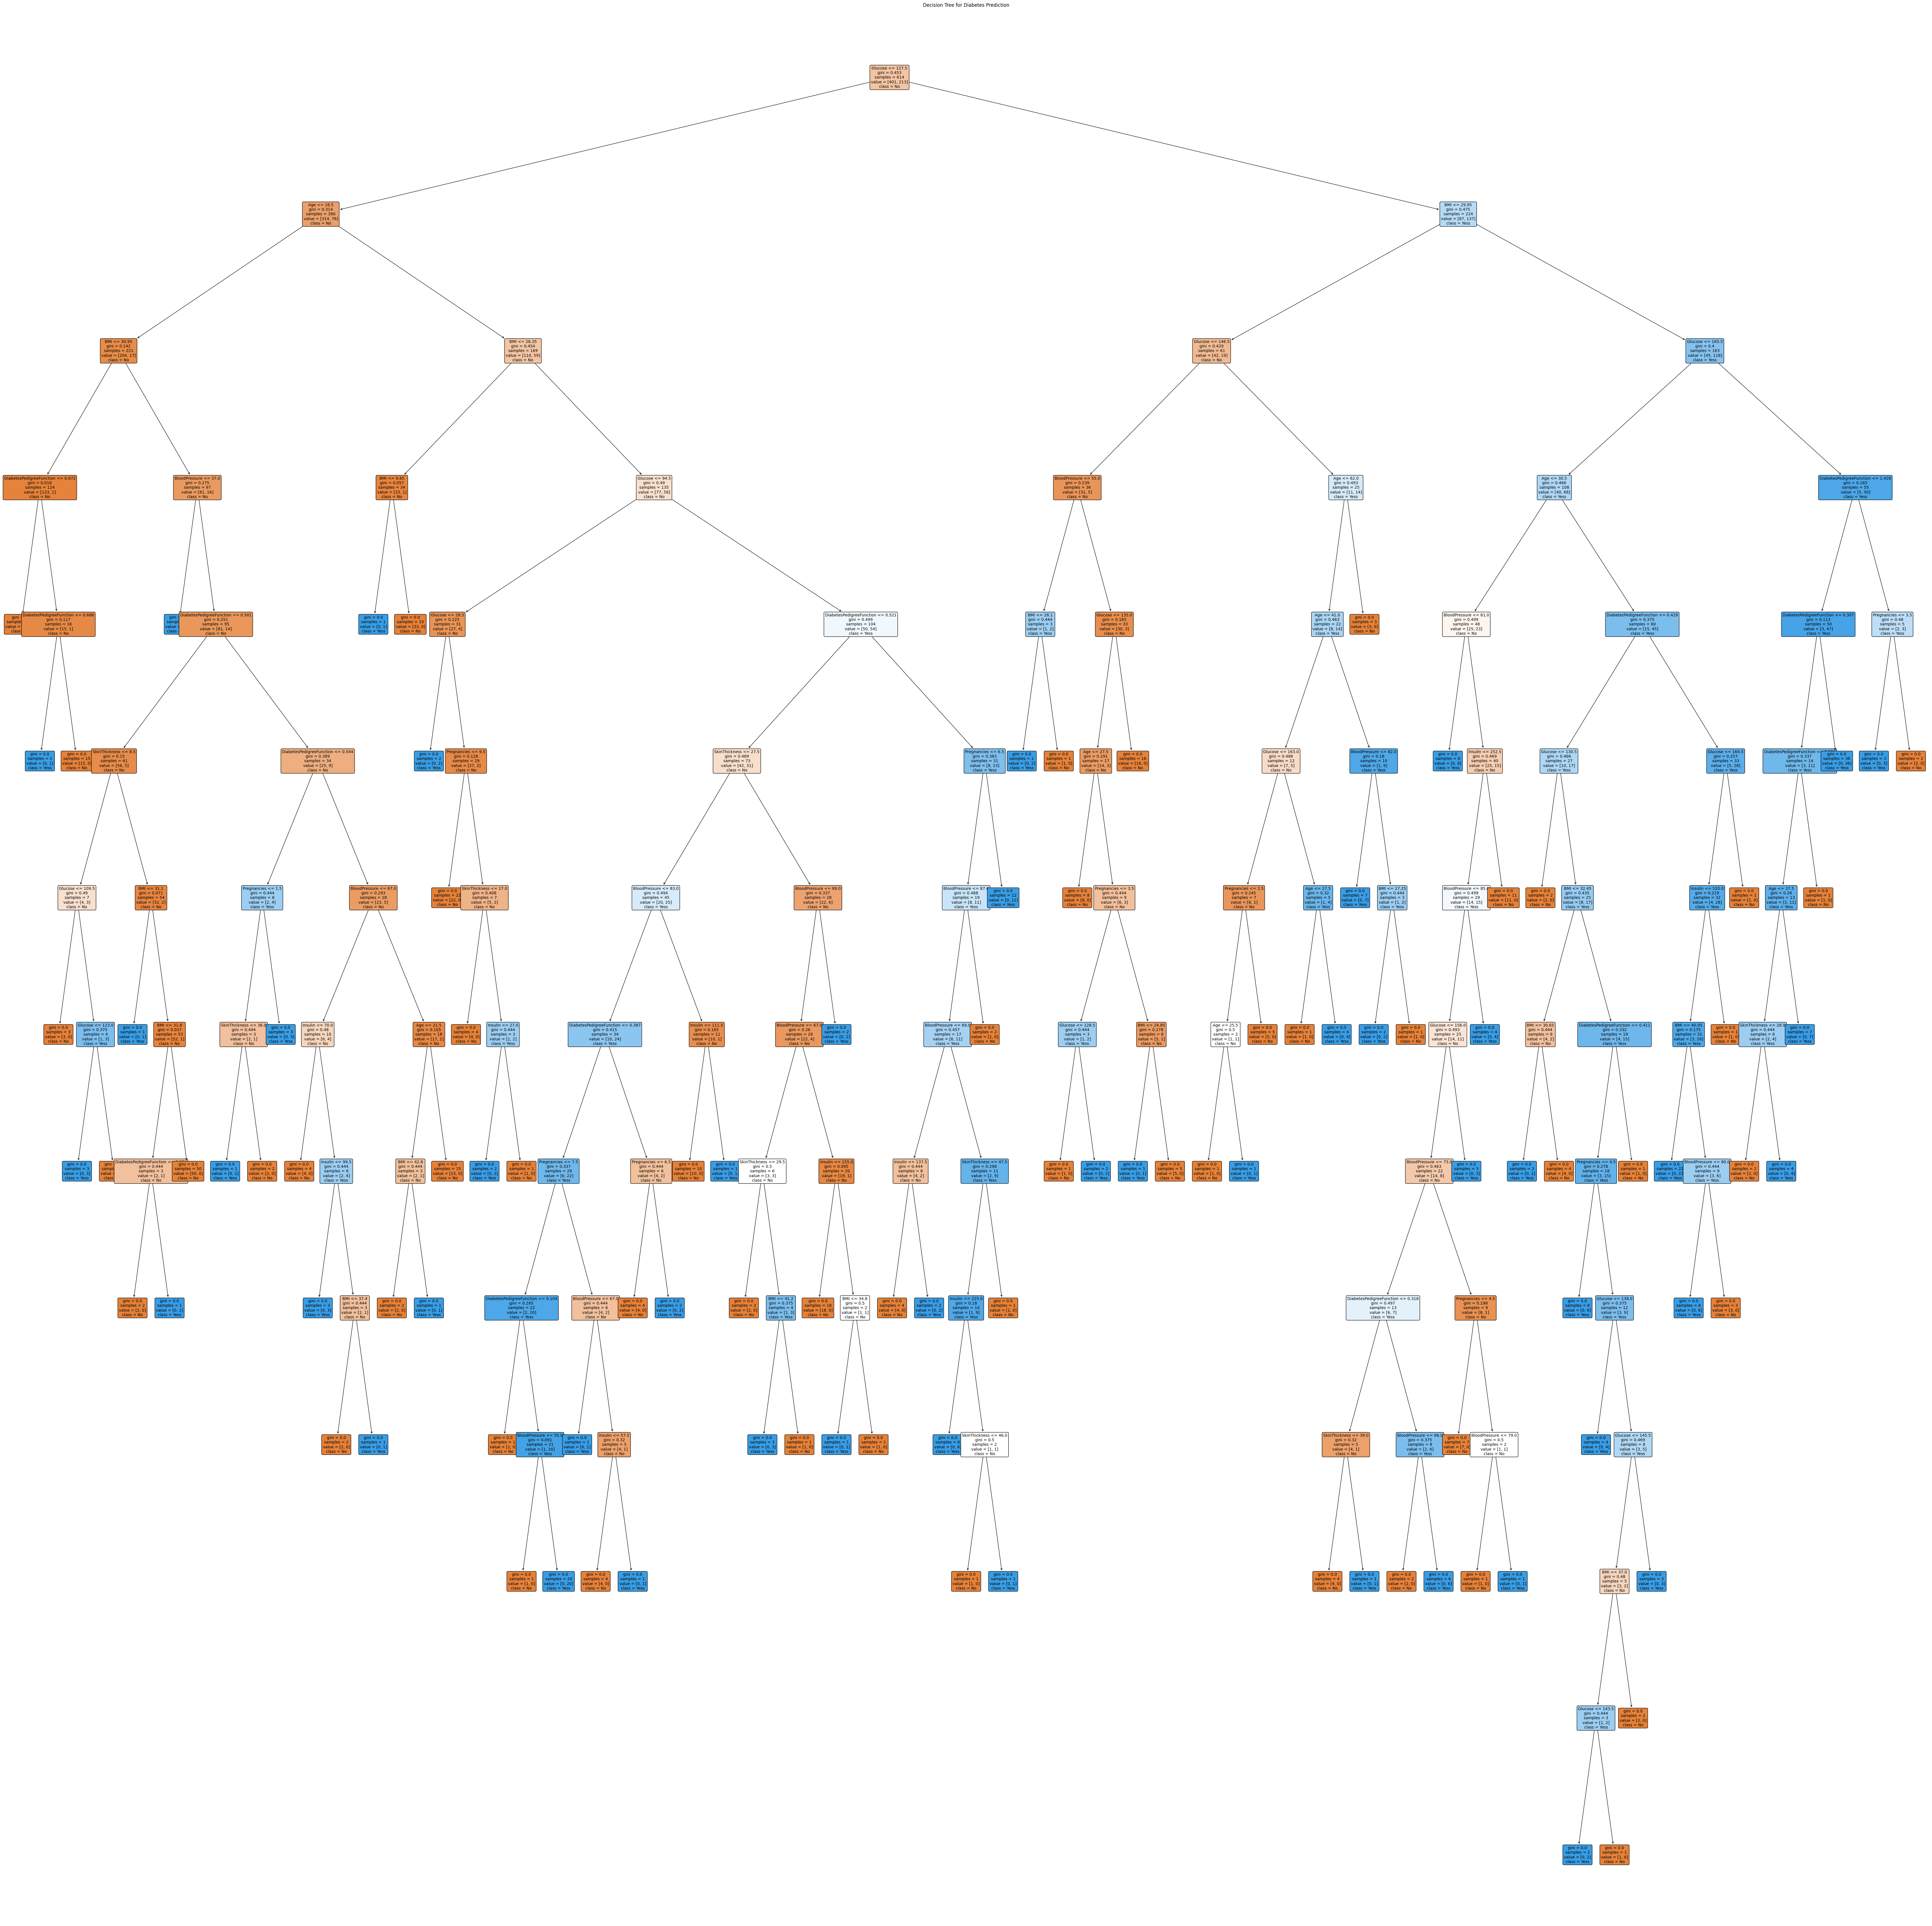

In [29]:
#Plottinge
plt.figure(figsize=(88,88))
plot_tree(dtc, filled=True, feature_names=X.columns, class_names=["No", "Yess"], rounded=True, fontsize=10)
plt.title("Decision Tree for Diabetes Prediction")
plt.show()


In [33]:
#2 Implement a simple Naive Bayes model on a loan dataset
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB #Import statement for Naive_baye GaussianNB


In [34]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("burak3ergun/loan-data-set")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/loan-data-set


In [76]:
Data=pd.read_csv('/kaggle/input/loan-data-set/loan_data_set.csv')
Data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [79]:
from sklearn.impute import SimpleImputer

# Check if there are any missing values
print(X.isnull().sum())

# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Now, X_imputed is the dataset with missing values replaced by the mean
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Train the model using the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Gender_Male                 0
Married_Yes                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Self_Employed_Yes           0
Education_Not Graduate      0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64
Accuracy: 0.78

Classification Report:
              precision    recall  f1-score   support

           N       0.90      0.42      0.57        43
           Y       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123


Confusion Matrix:
[[18 25]
 [ 2 78]]
